# Data Analysis

## TBD
1. 数据预处理之后再看一下相关系数
1. 观察数据的时候，功能都整理成函数，这样方便移动到data_process中，数据也更容易操作。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 数据读取

In [2]:
ALL_DAY = [1,2,3,4,5,6,7]
DROP_DAY = []
TRAIN_DAY = [1,2,3,4,5,6]
VAL_DAY = list(set(ALL_DAY).difference(set(TRAIN_DAY).union(set(DROP_DAY))))
TEST_DAY = [8]

In [3]:
train_df = pd.read_csv("../Input/round1_ijcai_18_train_20180301/round1_ijcai_18_train_20180301.txt",sep=" ")
test_a_df = pd.read_csv("../Input/round1_ijcai_18_test_a_20180301/round1_ijcai_18_test_a_20180301.txt",sep=" ")
test_b_df = pd.read_csv("../Input/round1_ijcai_18_test_b_20180418/round1_ijcai_18_test_b_20180418.txt",sep=" ")
test_df = test_a_df
test_df = test_df.append(test_b_df)
all_data_df =train_df
all_data_df = all_data_df.append(test_a_df)
all_data_df = all_data_df.append(test_b_df)

print("train_df shape: ",train_df.shape,"test_a_df shape: ",test_a_df.shape,"test_b_df:",test_b_df.shape,"all_data_df: ",all_data_df.shape)
print("unique instance count in train: %s \n" % len(train_df["instance_id"].unique()),
      "unique instance count in test_a: %s \n" % len(test_a_df["instance_id"].unique()),
      "unique instance count in test_b: %s \n"% len(test_b_df["instance_id"].unique()),
      "unique instance count in test: %s \n" % len(test_df["instance_id"].unique()))
# 测试数据集a中包含了不到一天的数据

train_df shape:  (478138, 27) test_a_df shape:  (18371, 26) test_b_df: (42888, 26) all_data_df:  (539397, 27)
unique instance count in train: 478087 
 unique instance count in test_a: 18371 
 unique instance count in test_b: 42888 
 unique instance count in test: 61259 



以上
1. train数据集中有重复的数据，test_a和test_b里面都没有显示重复的记录
1. 探索下重复的数据

In [4]:
test_df.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description
0,2475218615076601065,2275895163219263378,7908382889764677758;8277336076276184272,2636395404473730413;7515802706813700848;302719...,7838285046767229711,7534238860363577544,7,6,8,14,...,1537885700,4005,8277336076276184272:-1;5799347067982556520:-1;...,5275548996133547595,13,0.985244,5011,0.964023,0.966550,0.955378
1,398316874173557226,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537862843,4001,"5755694407684602296:216555019471416386,2636395...",329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134
2,6586402638209028583,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537858222,4011,5755694407684602296:2636395404473730413;871073...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134
3,1040996105851528465,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537860915,4001,8710739180200009128:-1;5755694407684602296:263...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134
4,6316278569655873454,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537859074,4001,5755694407684602296:5131280576272319091;871073...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134


## 训练集测试集比例

In [5]:
from pyecharts import Pie

attr = ["train","test",]
v1 = [train_df.shape[0],test_df.shape[0]]
pie = Pie("训练集数据集比例","训练数据->train_df, 测试数据->test_df")
pie.use_theme("dark")
pie.add("", attr, v1, is_label_show=True)
pie

In [6]:
import random
from pyecharts import Pie,Style
style = Style()
pie_style = style.add(
    label_pos="center",
    is_label_show=True,
    label_text_color=None
)
pie = Pie("训练数据测试数据比例", width=800, height=400, title_pos='center')
pie.use_theme("dark")
pie.add("", ["train","test"], [train_df.shape[0],test_df.shape[0]],
        radius=[45, 55], center=[25, 50])
pie.add("", ["train", "test_a", "test_b"], [train_df.shape[0], test_a_df.shape[0], test_b_df.shape[0]],
        radius=[0, 40], center=[25, 50], rosetype='area', is_label_show=True)
pie.add("", ["train","test"], [train_df.shape[0],test_df.shape[0]],
        radius=[45, 55], center=[65, 50], is_label_show=True, label_pos="bottom")
pie.add("", ["train", "test_a", "test_b"], [train_df.shape[0], test_a_df.shape[0], test_b_df.shape[0]],
        radius=[0, 40], center=[65, 50], is_legend_show=False,rosetype='radius')
pie

In [7]:
for fea in test_a_df.columns.tolist():
    if(len(train_df[fea].unique()) == \
       len(test_b_df[fea].unique())== \
       len(test_df[fea].unique())):
        pass 
    else:
        print("----%s----\ntrain %s\t all_data %s\t test %s\t test_a %s\t test_b %s" % (fea,
                                                         len(train_df[fea].unique()),
                                                         len(all_data_df[fea].unique()),
                                                         len(test_df[fea].unique()),
                                                         len(test_a_df[fea].unique()),
                                                         len(test_b_df[fea].unique())))

----instance_id----
train 478087	 all_data 539337	 test 61259	 test_a 18371	 test_b 42888
----item_id----
train 10075	 all_data 10527	 test 5651	 test_a 3695	 test_b 5051
----item_property_list----
train 10908	 all_data 11530	 test 5643	 test_a 3690	 test_b 5044
----item_brand_id----
train 2055	 all_data 2104	 test 1414	 test_a 1101	 test_b 1316
----item_city_id----
train 128	 all_data 130	 test 115	 test_a 99	 test_b 112
----item_price_level----
train 14	 all_data 14	 test 12	 test_a 10	 test_b 12
----item_pv_level----
train 22	 all_data 22	 test 22	 test_a 21	 test_b 21
----user_id----
train 197694	 all_data 219774	 test 29396	 test_a 13573	 test_b 24070
----context_id----
train 478111	 all_data 539370	 test 61259	 test_a 18371	 test_b 42888
----context_timestamp----
train 281824	 all_data 319327	 test 37503	 test_a 15592	 test_b 30004
----predict_category_property----
train 78796	 all_data 87135	 test 13991	 test_a 6964	 test_b 11680
----shop_id----
train 3959	 all_data 4081	 test 2

以上
1. instance_id不考虑，但是能看出来，实际上有重复instance_id的数据
1. item_id 全数据要比train多，说明有新品，这些新品的点击率要靠其他商品信息做参考
1. item_property_list 要分解之后，总共就三段应该不用分解了。
1. item_brand_id全数据依然多
1. item_city_id测试数据集中多两个
1. [查]item_price_level 测试集要比训练集要少，多的这部分可能是没用的。要不要看看有没有成交记录？这个不一定要删除，如果分桶的话，就无所谓了。
1. shop_id，全数据比训练数据高，说明有122家新店。
1. [查]shop_review_num_level 评价数量等级，这个也没有。

其实只看unique数据集大小也不全对，集合可能不一样。



## 重复值

In [8]:
from pyecharts import Funnel, Grid
attr = ["test_a", "test_b", "test", "train","train+test", "all_data"]
train_and_test = 478087 + 61259
values = [18371, 42888, 61259, 478087, 478087 + 61259, 539337]
funnel = Funnel("Instance_ID分布情况","可以知道存在重复的脏数据，处理中drop掉了这部分数据"
                ,width=800, height=400,title_pos="center")
funnel.use_theme("dark")
funnel.add("instance_id", attr, values, is_label_show=True,
           label_pos="outside", legend_orient='vertical', legend_pos='left',legend_top=150)
funnel

In [9]:
print("|fea|all_data|train+test|train|test|test_a|test_b|" )
print("|-|-|-|-|-|-|-|")    
for fea in test_a_df.columns.tolist():
    if(len(train_df[fea].unique()) == \
       len(test_b_df[fea].unique())== \
       len(test_df[fea].unique())):
        pass 
    else:
        print("|%s|%s|%s|%s|%s|%s|%s|" % (fea,
                                          len(all_data_df[fea].unique()),
                                          len(train_df[fea].unique()) + len(test_df[fea].unique()),
                                          len(train_df[fea].unique()),
                                          len(test_df[fea].unique()),
                                          len(test_a_df[fea].unique()),
                                          len(test_b_df[fea].unique())))

|fea|all_data|train+test|train|test|test_a|test_b|
|-|-|-|-|-|-|-|
|instance_id|539337|539346|478087|61259|18371|42888|
|item_id|10527|15726|10075|5651|3695|5051|
|item_property_list|11530|16551|10908|5643|3690|5044|
|item_brand_id|2104|3469|2055|1414|1101|1316|
|item_city_id|130|243|128|115|99|112|
|item_price_level|14|26|14|12|10|12|
|item_pv_level|22|44|22|22|21|21|
|user_id|219774|227090|197694|29396|13573|24070|
|context_id|539370|539370|478111|61259|18371|42888|
|context_timestamp|319327|319327|281824|37503|15592|30004|
|predict_category_property|87135|92787|78796|13991|6964|11680|
|shop_id|4081|6657|3959|2698|2015|2488|
|shop_review_num_level|25|49|25|24|21|24|
|shop_review_positive_rate|13485|13654|11825|1829|1302|1657|
|shop_score_service|18572|18923|16361|2562|1963|2378|
|shop_score_delivery|18620|18972|16423|2549|1961|2368|
|shop_score_description|18692|19023|16463|2560|1959|2377|


In [10]:
print("\nitem_price_level in train : %s" %sorted(train_df["item_price_level"].unique()),
      "\nitem_price_level in test : %s" % sorted(test_df["item_price_level"].unique()))


item_price_level in train : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 17] 
item_price_level in test : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [11]:
train_df.columns
# 时间是timestamp

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade'],
      dtype='object')

In [12]:
# 看一下训练集中price level 16，17的记录
train_df[train_df["item_price_level"]== 17]
# 总共就两条记录，都未成交。这两条考虑删掉。

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
430354,8183283591889631987,93380979096233532,7908382889764677758;8277336076276184272,7323906747451897092;2636395404473730413;824657...,7838285046767229711,7534238860363577544,17,-1,0,7,...,4008,8277336076276184272:-1;7908382889764677758:263...,2089663807012712677,7,0.986111,5004,0.991795,0.98359,0.991795,0


## 价格分布

In [13]:
item_price_level_cnt= pd.DataFrame({"train": train_df["item_price_level"].value_counts(),
                                    "test": test_df["item_price_level"].value_counts()})
from pyecharts import Bar
item_price_level_cnt.sort_values("train",inplace=True,ascending=False)
bar = Bar("商品价格分布","区间16，17在训练集中都只出现了一次，在测试集中没有出现")
attr = item_price_level_cnt.index
bar.add("train", attr, item_price_level_cnt["train"],mark_line=["min", "max"])
bar.add("test", attr, item_price_level_cnt["test"], mark_line=["max"],yaxis_type="log")
bar.use_theme("dark")
bar

In [14]:
# 想看下成交记录多的是哪些价格的商品
train_df.groupby(by = ["item_price_level","is_trade"]).size()   

item_price_level  is_trade
0                 0               11
                  1                1
1                 0               80
                  1                5
2                 0              330
                  1               17
3                 0             3416
                  1              171
4                 0            13881
                  1              726
5                 0            39787
                  1             1270
6                 0            86996
                  1             2061
7                 0           206099
                  1             3186
8                 0           114034
                  1             1553
9                 0             4004
                  1               31
10                0              456
11                0               21
16                0                1
17                0                1
dtype: int64

In [15]:
ipl_df = train_df.groupby(by = ["item_price_level","is_trade"]).size().unstack()
ipl_df.fillna(0,inplace=True)
ipl_df["cvr"] = round(ipl_df[1]/ipl_df[0],3)

## 成交量与转化率

In [16]:
from pyecharts import Bar, Line, Overlap

attr = ipl_df.index
v1 = ipl_df[0].values
v2 = ipl_df[1].values
cvr = ipl_df["cvr"].values
bar = Bar("成交量与转化率",title_pos="center")
# bar.add("未成交", attr, v1)
bar.add("成交量", attr, v2,is_label_show=True, legend_orient="verticle",legend_top="20%",legend_pos="80%")

line = Line()
line.add("转化率", attr, cvr, is_fill=True, line_width=2,mark_point_symbolsize=100,
         area_color='#eee',area_opacity=0.3, is_smooth=True,is_label_show=True)

overlap = Overlap()
overlap.add(bar)
overlap.add(line,yaxis_index=1, is_add_yaxis=True)
overlap.use_theme("dark")
overlap

In [17]:
test_df.groupby(by = ["item_price_level"]).size()   

item_price_level
0         1
1         9
2        48
3       340
4      1653
5      4520
6     10879
7     27798
8     15439
9       560
10       11
11        1
dtype: int64

以上
1. 10以上没有成交的
1. 训练集中价格0的数据，转化率达到10%，这个有点扯淡。其实可以根据各个指标算一下转化率，超过一定值的都是outlier。
1. 这个数据不能直接做为数值特征。
1. 看一下price_level和成交率的关系

In [18]:
def clean_item_price_level_outlier(data):
#     删除训练集中价格0，成交的那条记录
    data = data.drop(data[data["item_price_level"] == 0][data["is_trade"] == 1].index)
    data = data.drop(data[data["item_price_level"] == 16].index)
    data = data.drop(data[data["item_price_level"] == 17].index)
    return data
train_df = clean_item_price_level_outlier(train_df)
train_df[train_df["item_price_level"] == 0][train_df["is_trade"] == 1]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade


In [19]:
def item_price_level_map(data):
    tmp_df = pd.DataFrame({"item_price_rate": data.groupby(by = ["item_price_level","is_trade"]).size()}).reset_index("is_trade")
    tmp_df = (tmp_df[tmp_df["is_trade"] == 1]/tmp_df[tmp_df["is_trade"]==0]).fillna(0).drop("is_trade",axis=1)
    tmp_df = tmp_df.reset_index()
    return tmp_df

tmp_df = item_price_level_map(train_df)
tmp_df

,item_price_level,item_price_rate
0,0,0.000000
1,1,0.062500
2,2,0.051515
3,3,0.050059
4,4,0.052302
5,5,0.031920
6,6,0.023691
7,7,0.015459
8,8,0.013619
9,9,0.007742


看一下shop_star_level

In [20]:
def shop_star_level_map(data):
    tmp_df = pd.DataFrame({"shop_star_rate": data.groupby(by = ["shop_star_level","is_trade"]).size()}).reset_index("is_trade")
    tmp_df = (tmp_df[tmp_df["is_trade"] == 1]/(tmp_df[tmp_df["is_trade"]==0]+tmp_df[tmp_df["is_trade"]==1])).fillna(0).drop("is_trade",axis=1)
    tmp_df = tmp_df.reset_index()
    return tmp_df
tmp_df = shop_star_level_map(train_df)
tmp_df

,shop_star_level,shop_star_rate
0,4999,0.000000
1,5000,0.012346
2,5001,0.033333
3,5002,0.012605
4,5003,0.015798
5,5004,0.022042
6,5005,0.014393
7,5006,0.018465
8,5007,0.023455
9,5008,0.016156


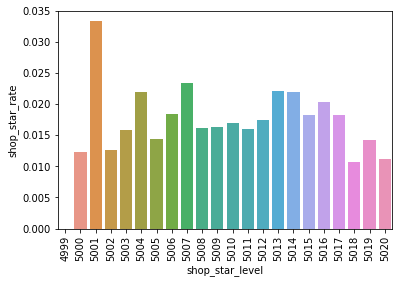

In [21]:
sns.barplot(x="shop_star_level",y="shop_star_rate",data=tmp_df)
plt.xticks(rotation=90)  
plt.show()

In [22]:
df1 = pd.DataFrame({"test":test_df.groupby(by="shop_star_level").size()}).reset_index()
df2 = pd.DataFrame({"train":train_df.groupby(by="shop_star_level").size()}).reset_index()
df = df1.merge(df2,on="shop_star_level")
df["rate"] = df["test"]/df["train"]
df

,shop_star_level,test,train,rate
0,4999,1,7,0.142857
1,5000,4,81,0.049383
2,5001,8,60,0.133333
3,5002,60,476,0.126050
4,5003,100,1266,0.078989
5,5004,233,862,0.270302
6,5005,192,1459,0.131597
7,5006,490,3087,0.158730
8,5007,635,5500,0.115455
9,5008,1052,8480,0.124057


以上
1. 训练数据和测试数据中样本分布差不多。
2. 为什么5001的转化率特别高？因为样本太少。删掉这两个店铺的数据打算。

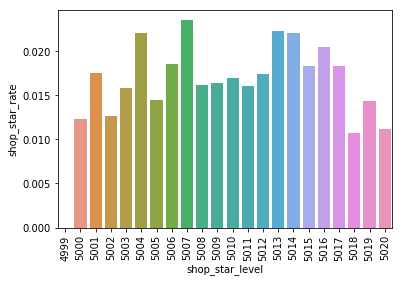

In [23]:
tmp_df = train_df.drop(train_df[train_df["shop_id"] == 7164491533039214442].index)
tmp_df = shop_star_level_map(tmp_df)
sns.barplot(x="shop_star_level",y="shop_star_rate",data=tmp_df)
plt.xticks(rotation=90)  
plt.show()

In [24]:
train_df[train_df["shop_star_level"]==5001].groupby(by=["shop_id","is_trade"]).size()

shop_id              is_trade
186080162486688852   0            2
485487383120751811   0            1
1043635626184798389  0            2
1452500335359730686  0            1
2070315423586706403  0           10
                     1            1
2208124188583720095  0            1
2617884520219040861  0            2
2660668271137057543  0            1
3172820969821029083  0            1
3761596693215068299  0            3
3787022327770676556  0            1
4904162868823360724  0            1
6071498802983152663  0            2
6966798123173112137  0            1
7012558765433202113  0            2
7145451318333435988  0            2
7164491533039214442  0            2
                     1            1
7770475295303865924  0            1
8172492564864361863  0           17
8364773547330244902  0            3
8492312755674620874  0            1
8678977490464080335  0            1
dtype: int64

In [25]:
train_df[train_df["shop_id"]==2070315423586706403]

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
189520,7310683095796770248,5497944622691461871,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;914848...,3735195907200868148,6027631083130214337,5,2,1,12,...,4003,"8277336076276184272:5131280576272319091,423030...",2070315423586706403,3,1.0,5001,1.0,1.0,1.0,0
189521,3833466050208956691,1350789391676318376,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;207296...,7838285046767229711,6027631083130214337,5,3,3,13,...,4001,509660095530134768:7429744967504106294;8710739...,2070315423586706403,3,1.0,5001,1.0,1.0,1.0,0
189522,2499514208731255672,1350789391676318376,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;207296...,7838285046767229711,6027631083130214337,5,3,3,13,...,4007,7258015885215914736:9148482949976129397;509660...,2070315423586706403,3,1.0,5001,1.0,1.0,1.0,1
189523,2558216377189236773,1350789391676318376,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;207296...,7838285046767229711,6027631083130214337,5,3,3,13,...,4008,8277336076276184272:-1;509660095530134768:2636...,2070315423586706403,3,1.0,5001,1.0,1.0,1.0,0
189524,1828760761743495828,5497944622691461871,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;914848...,3735195907200868148,6027631083130214337,5,2,1,12,...,4001,9121432215720987772:-1;7908382889764677758:263...,2070315423586706403,3,1.0,5001,1.0,1.0,1.0,0
189525,6710071859909208161,5497944622691461871,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;914848...,3735195907200868148,6027631083130214337,5,2,1,12,...,4014,"8277336076276184272:5131280576272319091,423030...",2070315423586706403,3,1.0,5001,1.0,1.0,1.0,0
253088,8148322816196462425,1350789391676318376,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;207296...,7838285046767229711,6027631083130214337,5,3,3,13,...,4001,"509660095530134768:2636395404473730413,3258780...",2070315423586706403,3,1.0,5001,1.0,1.0,1.0,0
253089,4682217192520467766,1350789391676318376,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;207296...,7838285046767229711,6027631083130214337,5,3,3,13,...,4013,"5755694407684602296:9148482949976129397,263639...",2070315423586706403,3,1.0,5001,1.0,1.0,1.0,0
253090,645360608599591660,1350789391676318376,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;207296...,7838285046767229711,6027631083130214337,5,3,3,13,...,4005,"509660095530134768:7429744967504106294,6072714...",2070315423586706403,3,1.0,5001,1.0,1.0,1.0,0
253091,4377627505467658087,1350789391676318376,7908382889764677758;8277336076276184272,2072967855524022579;2072967855524022579;207296...,7838285046767229711,6027631083130214337,5,3,3,13,...,4001,509660095530134768:-1;5799347067982556520:-1;8...,2070315423586706403,3,1.0,5001,1.0,1.0,1.0,0


In [26]:
test_df[test_df["shop_id"]==7164491533039214442]

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description


In [27]:
print("\nitem_brand_id in train : %s" %sorted(train_df["item_brand_id"].unique()),
      "\nitem_brand_id in test : %s" % sorted(test_df["item_brand_id"].unique()))


item_brand_id in train : [-1, 1519408548701639, 2258579918686057, 3319198235217144, 3718718487310364, 4083991695698405, 9283961194704687, 10179799365659567, 12889248311141240, 20146860753528028, 20994512933250522, 24686883552113049, 25728712499527633, 33199318976360609, 34279629232910055, 38444166278535506, 48560508375696200, 50094641739829925, 60085468723317312, 60741632119970923, 63507203778758599, 72082210741361909, 89950627625980961, 93802507035433851, 128437203215538941, 132473676516508137, 136334200187609148, 142762304458833439, 154240117998755021, 161155666911242476, 165460267080539536, 166347280773663615, 168295469382829391, 168539389200065406, 173290985872487153, 179179621872807992, 200967775838540985, 203481156419468130, 206377330343563115, 210903028616515233, 212546034675294321, 213005540714076483, 214823004492419937, 215585566825544575, 216096364461694795, 218311401413093427, 220872348806183811, 222046295950858523, 223136115558074817, 235459053353583513, 239861293453485799

In [28]:
train_df.groupby(by=["item_brand_id","is_trade"]).size()

item_brand_id         is_trade
-1                    0            464
                      1              9
 1519408548701639     0              2
 2258579918686057     0             84
 3319198235217144     0            347
                      1              9
 3718718487310364     0             45
 4083991695698405     0            256
                      1             20
 9283961194704687     0             47
 10179799365659567    0              9
 12889248311141240    0              2
 20146860753528028    0              2
 20994512933250522    0            534
                      1              4
 24686883552113049    0             10
 25728712499527633    0              2
 33199318976360609    0              2
 34279629232910055    0              5
 38444166278535506    0             14
 48560508375696200    0              1
 50094641739829925    0             39
 60085468723317312    0             37
                      1              1
 60741632119970923    0          

In [29]:
def item_brand_id_map(data):
    tmp_df = pd.DataFrame({"item_brand_id_rate": data.groupby(by = ["item_brand_id","is_trade"]).size()}).reset_index("is_trade")
    tmp_df = (tmp_df[tmp_df["is_trade"] == 1]/(tmp_df[tmp_df["is_trade"]==0]+tmp_df[tmp_df["is_trade"]==1])).fillna(0).drop("is_trade",axis=1)
    tmp_df = tmp_df.reset_index()
    return tmp_df
tmp_df = item_brand_id_map(train_df)
tmp_df.sort_values("item_brand_id_rate",ascending=False)

,item_brand_id,item_brand_id_rate
1293,5676453458942099902,0.500000
280,1286565666424348139,0.500000
299,1359892938149458087,0.500000
1047,4601153481500893111,0.500000
875,3897222661772848809,0.400000
1279,5616048608478795122,0.333333
1611,7171884609679593245,0.333333
1478,6553441911153962469,0.333333
1888,8457318464758319302,0.333333
1832,8173763638575374333,0.333333


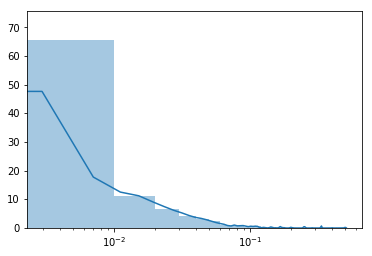

In [30]:
sns.distplot(tmp_df[["item_brand_id_rate"]])
plt.xscale("log")
plt.show()

以上
1. 没看出怎么处理这个好

In [31]:
def brand_shop_count(data):
    tmp_df = data.groupby(by=["item_brand_id","shop_id"]).size().reset_index()
    tmp_df.drop(0,inplace=True,axis=1)
    tmp_df = tmp_df.groupby(by="item_brand_id").size().reset_index()
    tmp_df.rename(columns={0:"brand_count"},inplace=True)
    return tmp_df
brand_shop_count(train_df).sort_values(by="brand_count",ascending=False) 

,item_brand_id,brand_count
1755,7838285046767229711,1019
160,739382823914881928,135
817,3697251094784296011,62
834,3765442984647241130,59
873,3884267719846612071,56
0,-1,52
546,2441922225904422164,52
427,1902568530584691432,27
948,4219436286513843074,24
1632,7286462071030783333,24


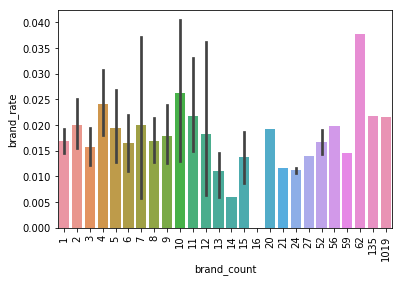

In [32]:
def brand_shop_rate(data):
    tmp_df = data.groupby(by=["item_brand_id","is_trade"]).size().reset_index("is_trade")
    tmp_df= tmp_df[tmp_df["is_trade"]==1]/(tmp_df[tmp_df["is_trade"]==0]+tmp_df[tmp_df["is_trade"]==1])
    tmp_df.drop("is_trade",axis=1,inplace=True)
    tmp_df.rename(columns={0:"brand_rate"},inplace=True)
    tmp_df = tmp_df.fillna(0)
    return tmp_df
df1 = brand_shop_rate(train_df).reset_index()
df2 = brand_shop_count(train_df)
df = df1.merge(df2,on="item_brand_id",how="left")
sns.barplot(x="brand_count",y="brand_rate",data=df)
plt.xticks(rotation=90)
plt.show()

In [33]:
df[df["brand_count"] == 12]

,item_brand_id,brand_rate,brand_count
565,2531599738408677057,0.013284,12
1049,4609398715869550725,0.017710,12
1316,5787989015305906570,0.008989,12
1388,6109614906407998996,0.000000,12
1652,7390590854874385698,0.051546,12


In [34]:
df[df["brand_count"] == 62]

,item_brand_id,brand_rate,brand_count
817,3697251094784296011,0.037807,62


以上
1. 可以看出，确实有同一个品牌在不同店铺销售的情况
1. 从count和rate的关系来看，变化比较大。应该没有直接关系。

看下职业和品牌之间有没有关系

In [35]:
train_df["user_occupation_id"].unique()

array([2005, 2002, 2004,   -1, 2003], dtype=int64)

In [36]:
def occupation_brand_rate(data):
    tmp_df = data.groupby(by=["user_occupation_id","item_brand_id","is_trade"]).size().reset_index("is_trade")
    tmp_df = tmp_df[tmp_df["is_trade"]==1]/(tmp_df[tmp_df["is_trade"]==1]+tmp_df[tmp_df["is_trade"]==0])
    tmp_df.rename(columns={0:"occupation_brand_rate"},inplace=True)
    tmp_df.drop("is_trade",inplace=True,axis=1)
    tmp_df = tmp_df.fillna(0)
    return tmp_df
df = occupation_brand_rate(train_df)
df = df[df["occupation_brand_rate"]>0].reset_index()
df.describe()
# sns.barplot(x="item_brand_id",y="occupation_brand_rate",data=df,hue="user_occupation_id")

,user_occupation_id,item_brand_id,occupation_brand_rate
count,1577.000000,1.577000e+03,1577.000000
mean,1990.954978,4.444761e+18,0.056945
std,159.183764,2.636352e+18,0.080010
min,-1.000000,-1.000000e+00,0.001142
25%,2002.000000,2.111760e+18,0.014151
50%,2004.000000,4.219436e+18,0.028571
75%,2005.000000,6.648616e+18,0.062500
max,2005.000000,9.222396e+18,0.666667


In [37]:
df.sort_values("occupation_brand_rate",ascending=False)

,user_occupation_id,item_brand_id,occupation_brand_rate
569,2002,8764049911495078171,0.666667
830,2004,7171884609679593245,0.500000
563,2002,8675795159345046330,0.500000
1303,2005,5616048608478795122,0.500000
966,2005,1359892938149458087,0.500000
380,2002,5480167263150546752,0.500000
311,2002,4173338066445297908,0.500000
838,2004,7847920073147268053,0.500000
836,2004,7606684487030084883,0.500000
619,2003,4206814617628879582,0.500000


In [38]:
train_df[train_df["user_occupation_id"] == 2002][train_df["item_brand_id"]==8764049911495078171]["user_id"]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


64281     4917130427933788788
207423    4808868874005931026
345199    5828726624363583860
Name: user_id, dtype: int64

In [39]:
train_df[train_df["user_id"]==5828726624363583860]

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
294092,6568065847808790539,4817583173619024436,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;462193...,7166307405309656478,7322157373578955368,7,16,17,20,...,4001,5799347067982556520:343813537575039244;5755694...,8767852016880076521,21,1.000000,5018,0.975652,0.975171,0.985721,0
318827,5947874199670734027,4496678950997788682,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;655689...,1885778242503695506,3948283326616421003,7,11,13,14,...,4001,5755694407684602296:1975237382674245143;871073...,4085579424400430535,15,1.000000,5013,0.967513,0.968543,0.982045,1
336548,8296918948082145755,8065778471433772532,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;121077...,253143647144366194,7322157373578955368,7,10,11,15,...,4001,5755694407684602296:1975237382674245143;579934...,4628072789419365451,15,0.976498,5013,0.968471,0.967561,0.967091,0
345199,8149988871626615476,4485504563246512265,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;365787...,8764049911495078171,3948283326616421003,6,9,8,13,...,4001,5755694407684602296:1975237382674245143;871073...,4399149746055755989,11,0.983483,5009,0.969169,0.972359,0.963854,0
353732,5077006195824196555,1435793674481822989,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;655689...,2351872337432696380,7534238860363577544,6,12,11,16,...,4002,5755694407684602296:1975237382674245143;579934...,2468894313207712620,12,0.983394,5009,0.963954,0.960883,0.961578,0


In [40]:
train_df[["user_id","is_trade"]][train_df["item_brand_id"] == 5676453458942099902]

,user_id,is_trade
48169,3857596211171960945,1
469117,4764371363537420123,0


In [41]:
test_df[["user_id"]][test_df["item_brand_id"] == 5676453458942099902]

,user_id
18227,2111237772972650298


In [42]:
train_df[train_df["item_brand_id"]==5676453458942099902].groupby(by="is_trade").size()

is_trade
0    1
1    1
dtype: int64

In [43]:
train_df[train_df["shop_id"]==8705929389756591100].sort_values("item_id")

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
444337,7097609999282826071,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4001,"5755694407684602296:1725845221699571933,403435...",8705929389756591100,14,0.991184,5012,0.969524,0.968208,0.965645,0
351545,1310544765385457949,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4001,509660095530134768:-1;5755694407684602296:-1;7...,8705929389756591100,14,0.991201,5012,0.969431,0.967913,0.965167,0
444336,980224488395899306,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4013,5755694407684602296:-1;7908382889764677758:-1,8705929389756591100,14,0.991184,5012,0.969524,0.968208,0.965645,0
285180,3098877876335579535,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4001,509660095530134768:5131280576272319091;2648343...,8705929389756591100,14,0.991219,5012,0.969478,0.968060,0.964776,0
213806,2012600223614360250,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4001,5755694407684602296:-1;6948560137918828076:721...,8705929389756591100,14,0.991244,5012,0.969190,0.967893,0.964843,0
213805,4934849711455656738,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4004,509660095530134768:-1;5755694407684602296:-1;7...,8705929389756591100,14,0.991244,5012,0.969190,0.967893,0.964843,0
351548,4230137677487317089,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4001,5755694407684602296:5131280576272319091;836752...,8705929389756591100,14,0.991201,5012,0.969431,0.967913,0.965167,0
351550,87919457913093071,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4001,"5755694407684602296:3657871859501171040,172584...",8705929389756591100,14,0.991201,5012,0.969431,0.967913,0.965167,0
145745,3416502231940904305,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4002,8710739180200009128:5117290135792467652;575569...,8705929389756591100,14,0.991226,5012,0.969146,0.967824,0.964812,0
145743,3156430490221759725,783621491969818072,7908382889764677758;5755694407684602296,5131280576272319091;1210779090663804691;643479...,660793036082829259,7322157373578955368,7,8,8,14,...,4001,5755694407684602296:6914500122677572753;509660...,8705929389756591100,14,0.991226,5012,0.969146,0.967824,0.964812,0


In [44]:
train_df[["shop_id","item_id","is_trade"]].groupby(by=["shop_id"])

In [45]:
def data_split_by_day(data,days=TRAIN_DAY):
    data["time_"] = data["context_timestamp"].apply(lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(x)))
    data["time_t"] = data["time_"].apply(pd.to_datetime)
    data["day"] = data["time_t"].dt.day - 17 # caution : hardcode
    data['hour'] = data['time_t'].dt.hour
    data['min'] =  data['time_t'].dt.minute
    # 希望9-18是周一，按照日期偏差刚好  
    data["dow"] = data["time_t"].dt.dayofweek
    data["dow"] = data["dow"].apply(lambda x : 7 if x == 0 else x)
    data_split = []
    for i in days:
        data_temp = data[data["day"] == i]
        del data_temp["time_t"]
        data_split.append(data_temp)
    return data_split

# 希望构建一个和时间相关的统计特征，每个小时的成交率，那么测试集怎么弄，按天统计，希望能给个参考。7天是一周的循环。
# 如果用这个的话，那应该把重复值处理掉。
def hour_count(data):
#     logger.info("hour count")
    hour_count_df = pd.DataFrame(data.groupby(by=["hour","is_trade"]).size(),columns=["hour_count"]).reset_index()
    count_is_trade_df = hour_count_df[hour_count_df["is_trade"] == 1].set_index("hour")
    count_no_trade_df = hour_count_df[hour_count_df["is_trade"] == 0].set_index("hour")
    hour_count = pd.DataFrame({"hour_count":count_is_trade_df["hour_count"]/count_no_trade_df["hour_count"]}).reset_index()
    data = pd.merge(data,count_df,on=["hour"],how="left")
    return data
# useless
def get_hour_count_map(data,days):
#     logger.info("Start to get hour count mapper")
#     logger.info("Split data by %s days." % days)
    # 日期分桶统计特征
    data_split= data_split_by_day(data,days=days)    
    data_processed = []
    for (data_,day) in zip(data_split,days):
#         logger.info("get hour count of %ith day." % day)
#       拿到每天分小时的trade_rate
        data_ = hour_count(data_)
        data_processed.append(data_)     
    return data_processed


In [46]:
import time

# 数据预处理，主要添加时间相关的信息，统计点击数量，这个算是分桶了
def process(data):
    # 添加datetime类型变量，提取day，hour
    data["time_"] = data["context_timestamp"].apply(lambda x : time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(x)))
    data["day"] = pd.to_datetime(data["time_"]).dt.day - 17
    data["hour"] = pd.to_datetime(data["time_"]).dt.hour
    return data

train_df = process(train_df)
test_a_df = process(test_a_df)
test_b_df = process(test_b_df)
all_data_df = process(all_data_df)

看一下B榜数据的起始和结束时间

In [47]:
# 看一下不同数据集的样本时间范围
def show_data_timerange(data):
    print("max time: ",data["time_"].max(),"min time", data["time_"].min())
print("train_df")
show_data_timerange(train_df)
print("test_a_df")
show_data_timerange(test_a_df)
print("test_b_df")
show_data_timerange(test_b_df)

train_df
max time:  2018-09-24 23:59:47 min time 2018-09-18 00:00:01
test_a_df
max time:  2018-09-25 23:59:25 min time 2018-09-25 00:00:02
test_b_df
max time:  2018-09-25 23:59:51 min time 2018-09-25 00:00:11


In [48]:
duplicate_ins = train_df.groupby(by="instance_id").size().sort_values(ascending = False)
duplicate_ins = pd.DataFrame({"dup_count":duplicate_ins[duplicate_ins>1]}).reset_index()
train_dup_df = pd.merge(train_df,duplicate_ins,on="instance_id",how="left")

In [49]:
print(len(train_dup_df["instance_id"]),len(train_dup_df["instance_id"].unique()))

478135 478084


In [50]:
train_dup_df = train_dup_df[train_dup_df["dup_count"]>1]
print("duplicated shop set size:",train_dup_df["shop_id"].unique().shape,
      "duplicated user set size",train_dup_df["user_id"].unique().shape,
      "duplicated item set size",train_dup_df["item_id"].unique().shape)

duplicated shop set size: (66,) duplicated user set size (73,) duplicated item set size (69,)


以上
1. 总计重复的样本数是100条
1. 从shop，user，item的角度看，都有些数据是重叠的。
1. 分析一下有什么规律

In [51]:
def trade_rate(data):
    return data[data["is_trade"]==1].shape[0]/data.shape[0]

In [52]:
print("train_df trade_rate:",trade_rate(train_df),"train_dup_df trade_rate:",trade_rate(train_dup_df))

train_df trade_rate: 0.018864964915766468 train_dup_df trade_rate: 0.52


In [53]:
print(sorted(train_df["hour"].unique()))
# 这一列数据要不要处理成1-24？
#  one_hot的大小是要弄成1-n？然后再做？

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


以上，
1. 100条记录里面有半数以上是交易的，这部分数据有点异常。
1. 显然重复掉的交易记录，对结果会有不好的影响。

In [54]:
train_df.shape

(478135, 30)

In [55]:
train_df.drop_duplicates("instance_id")

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,time_,day,hour
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.000000,5002,1.000000,1.000000,1.000000,0,2018-09-18 10:09:04,1,10
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.000000,5002,1.000000,1.000000,1.000000,0,2018-09-18 12:00:32,1,12
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.000000,5002,1.000000,1.000000,1.000000,0,2018-09-18 03:04:12,1,3
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.000000,5002,1.000000,1.000000,1.000000,0,2018-09-18 06:17:50,1,6
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.000000,5002,1.000000,1.000000,1.000000,0,2018-09-18 19:48:40,1,19
5,7764762765372067286,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.000000,5002,1.000000,1.000000,1.000000,0,2018-09-18 23:00:55,1,23
6,6956333474094867789,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,15,0.985427,5012,0.974878,0.976863,0.969278,0,2018-09-18 22:18:37,1,22
7,8387099821892927911,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,15,0.985427,5012,0.974878,0.976863,0.969278,0,2018-09-18 16:58:40,1,16
8,4021878205550012615,5202355029344881809,7908382889764677758;5755694407684602296,2072967855524022579;5131280576272319091;263639...,5520678735822176314,548352491538518780,8,9,10,16,...,15,0.985427,5012,0.974878,0.976863,0.969278,0,2018-09-18 02:27:51,1,2
9,6499571365974135517,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,15,0.985427,5012,0.974878,0.976863,0.969278,0,2018-09-18 23:43:10,1,23


通过drop_duplicates删掉之后，数据大小是27，但是instance_id查出来的是100。什么原因造成差异？
drop_duplicates("instance_id")这个结果和用instance_id统计的是一样的。

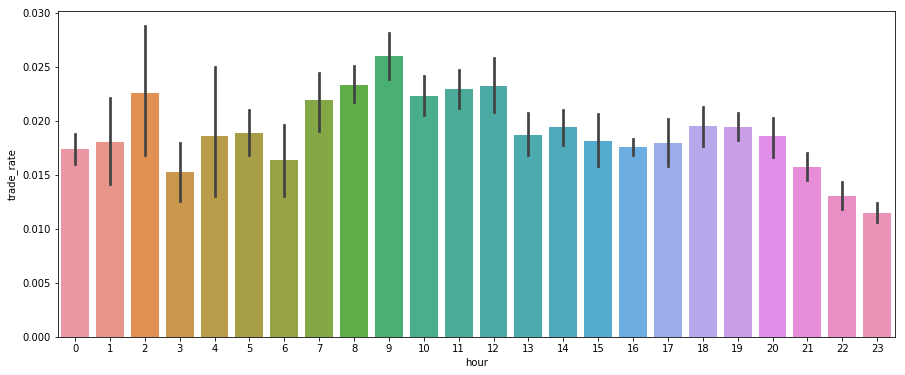

In [56]:
plt.figure(figsize=(15,6))
trade_rate_df = pd.DataFrame({"trade_rate":train_df.groupby(by=["day","hour"]).apply(trade_rate)}).reset_index()
sns.barplot(x="hour",y="trade_rate",data=trade_rate_df)
plt.show()

In [57]:
train_df.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,time_,day,hour
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 10:09:04,1,10
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 12:00:32,1,12
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 03:04:12,1,3
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 06:17:50,1,6
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 19:48:40,1,19


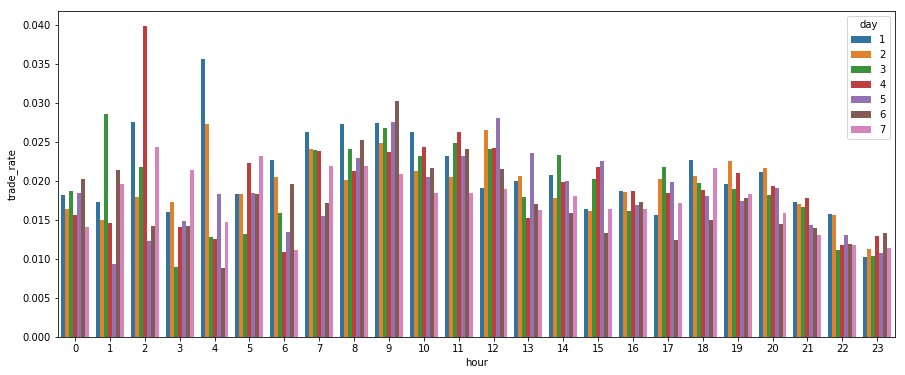

In [58]:
plt.figure(figsize=(15,6))
trade_rate_df = pd.DataFrame({"trade_rate":train_df.groupby(by=["day","hour"]).apply(trade_rate)}).reset_index()
sns.barplot(x="hour",y="trade_rate",data=trade_rate_df,hue="day")
plt.show()

In [59]:
set(trade_rate_df["day"])

{1, 2, 3, 4, 5, 6, 7}

## 七日转化率热力图

In [60]:
import random
from pyecharts import HeatMap

x_axis = [
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11",
    "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]
y_axis = ["1", "2", "3", "4", "5", "6", "7"]
trade_rate_df["CVR"]=round(trade_rate_df["trade_rate"]*1000,1)
trade_rate_df["day_"]=trade_rate_df["day"]-1
data = trade_rate_df[["hour","day_","CVR"]].values
heatmap = HeatMap("七日转化率热力图",title_pos="center")
heatmap.use_theme("dark")
heatmap.add("", x_axis, y_axis, data, is_visualmap=True,
            visual_text_color="#000", visual_orient='horizontal',visual_range=[10, 40])
heatmap
# 坐标数值要从0开始，不然会出现一个空行

以上
1. 1，2，4数据变化范围比较大
1. 4的2点成交率特别高，有点异常啊


In [61]:
train_df[train_df["day"] == 4][train_df["hour"] == 2][train_df["is_trade"] == 1]["item_id"].sort_values()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


143739     521169433218119288
119419     945108349592151499
122843    1748414709979232316
87984     2627915810217398910
83503     2665075329164289785
140343    2970981598372680064
120076    3872084563733545577
136499    4277051027206578099
110838    5238716590456407047
105018    5586531724608162781
123409    6395107377328520951
148665    7571040115342154623
106416    8137016472216757320
95016     8616744346943360568
Name: item_id, dtype: int64

In [62]:
train_df[train_df["is_trade"] ==1][train_df["shop_id"] ==8953967780295706657].shape

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(249, 30)

In [63]:
train_df[train_df["shop_id"] ==8953967780295706657].shape

(8353, 30)

In [64]:
249/8353

0.029809649227822338

In [65]:
test_a_set = set(test_a_df["instance_id"].unique())
test_b_set = set(test_b_df["instance_id"].unique())
test_a_set&test_b_set

set()

以上：
1. test_a和test_b时间范围一样
1. test_a和test_b互斥
训练的时候，选择test_a+test_b,然后对预测的结果进行以下筛选，输出test_b对应的结果。



## 每天数据分布

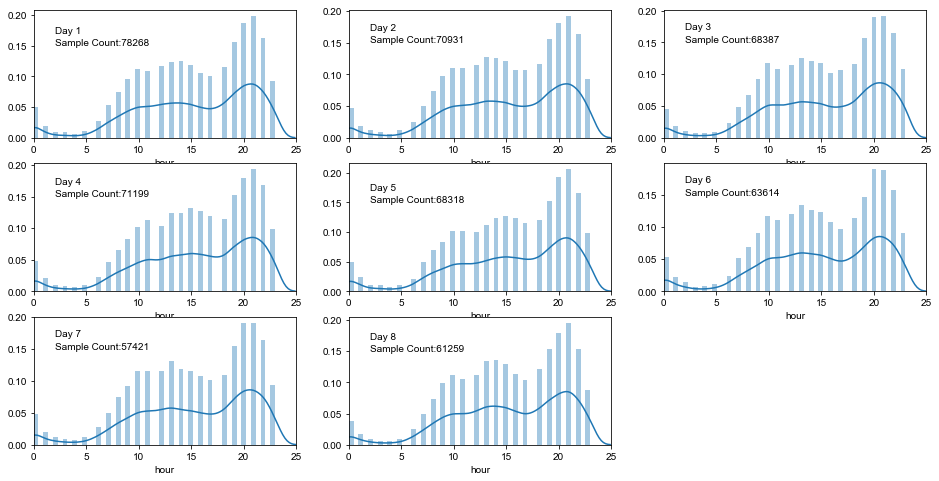

In [66]:
# 分析每天的数据分布
def data_dist_hour(data):
    plt.rcParams['axes.facecolor']='white'
    plt.subplots(figsize=(16,8))
    plot_temp = 330
    for pos in [331,332,333,334,335,336,337,338]:
        p = plt.subplot(pos)
        sub_data = data["hour"][data["day"]==pos-plot_temp]
        sns.distplot(sub_data)
        plt.xlim((0,25))
        plt.text(2, 0.17,"Day {0}".format(pos-plot_temp))
        plt.text(2, 0.15,"Sample Count:{0[0]}".format(sub_data.shape))
    sns.set_style("white")  
    plt.show()
    
data_dist_hour(all_data_df)

上面数据,可以看到一些样本随时间的分布情况：
1. 1,2,3,4,5,7峰值比较像。
1. 8的数据分布还OK，test_a中数据抽样了，数据量少，补充test_b之后和其他日期差不多。

## 每小时成交量

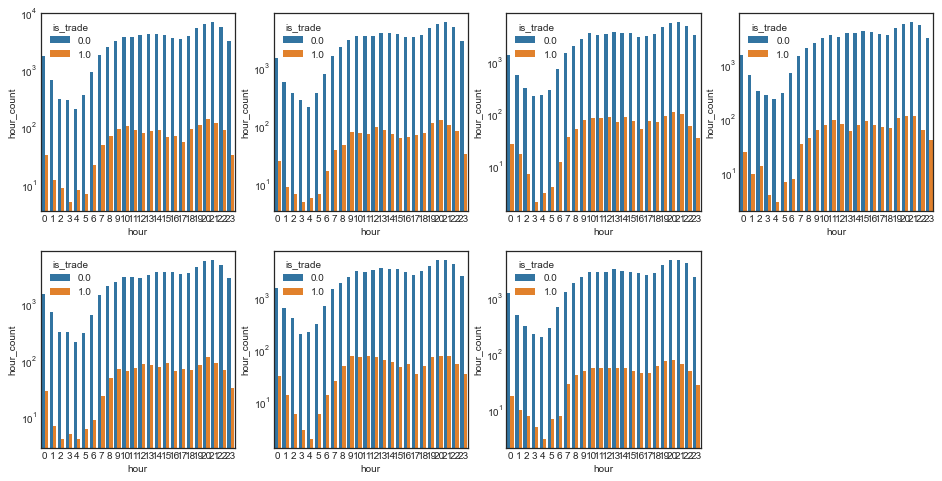

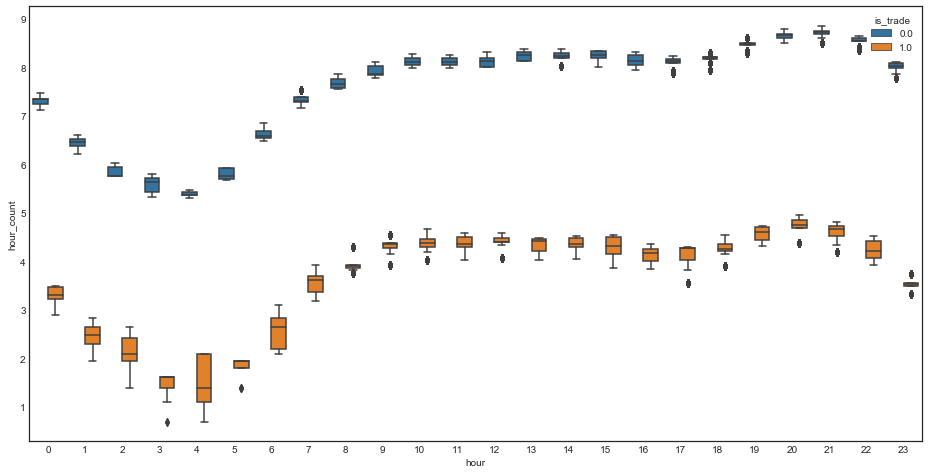

In [67]:
# 分析每天的数据分布
def data_dist_hour(data):
    hour_count_ = []
    
    plt.subplots(figsize=(16,8))
    for pos in [1,2,3,4,5,6,7]:
        sub_data=data[data["day"]==pos]
        hour_ = pd.DataFrame(sub_data.groupby(by=["hour","is_trade"]).size(),
                                columns=["hour_count"]).reset_index()
        sub_data = pd.merge(hour_,sub_data,on=["hour","is_trade"],how="left")
        hour_count_.append(sub_data)
        plt.subplot(pos+240)
        sns.barplot(x="hour",
                    y="hour_count",
                    data=sub_data,
                    hue="is_trade")
        plt.yscale("log")
    hour_count_df = pd.concat(hour_count_)
    hour_count_df["hour_count"] = hour_count_df["hour_count"].apply(np.log)
    plt.rcParams['axes.facecolor']='white'
    
    plt.subplots(figsize=(16,8))
    sns.boxplot(x="hour",
                y="hour_count",
                hue="is_trade",
                data=hour_count_df)
    sns.set_style("white")  
    plt.show()
data_dist_hour(all_data_df)

以上
1. 这里面能看出来一个点是8，23的时候成交量相对稳定？
2. 把hour_count_log作为一个统计特征，对于该时段的成交概率做个参考。
3. hour这个因素，本身确实是有大小关系的，至少有先后关系，这个是不是考虑作为一个连续值的特性考虑在这个里面，就类似周一-周日
4. 计算每天的按照小时的转化率，做标记，1，5，8：2，3，4，6，7这样分布。
5. 直接做一个转化率的曲线，看一下变化，7天放在一起看差异。


## 相关系数矩阵

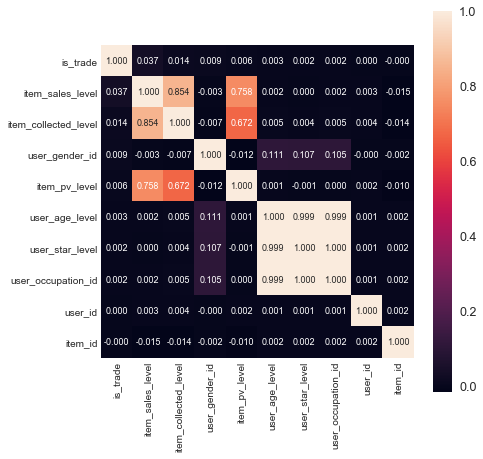

In [68]:
corrmat = train_df.corr()
k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize = (7, 7))
cols = corrmat.nlargest(k, 'is_trade')['is_trade'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', ax = ax, annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

这个矩阵应该是看一半就可以了。<br>
上面是不是可以看出来这些信息：
* age，star，occupation这几个可能可以推出来gender
* collected_level和sales_level这两个特征差不多
* age和occupation强相关，start和age强相关，star和occupation强相关，基本上就是有对应关系


In [69]:
# 把缺失值换成nan，用info看一下有多少是空的。
import numpy as np
train_df.replace(-1,np.nan,inplace=True)
test_df.replace(-1,np.nan,inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478135 entries, 0 to 478137
Data columns (total 30 columns):
instance_id                  478135 non-null int64
item_id                      478135 non-null int64
item_category_list           478135 non-null object
item_property_list           478135 non-null object
item_brand_id                477662 non-null float64
item_city_id                 477858 non-null float64
item_price_level             478135 non-null int64
item_sales_level             477223 non-null float64
item_collected_level         478135 non-null int64
item_pv_level                478135 non-null int64
user_id                      478135 non-null int64
user_gender_id               465234 non-null float64
user_age_level               477172 non-null float64
user_occupation_id           477172 non-null float64
user_star_level              477172 non-null float64
context_id                   478135 non-null int64
context_timestamp            478135 non-null int64
contex

In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61259 entries, 0 to 42887
Data columns (total 26 columns):
instance_id                  61259 non-null int64
item_id                      61259 non-null int64
item_category_list           61259 non-null object
item_property_list           61259 non-null object
item_brand_id                61194 non-null float64
item_city_id                 61242 non-null float64
item_price_level             61259 non-null int64
item_sales_level             61148 non-null float64
item_collected_level         61259 non-null int64
item_pv_level                61259 non-null int64
user_id                      61259 non-null int64
user_gender_id               59631 non-null float64
user_age_level               61186 non-null float64
user_occupation_id           61186 non-null float64
user_star_level              61186 non-null float64
context_id                   61259 non-null int64
context_timestamp            61259 non-null int64
context_page_id          

In [71]:
478138-465236

12902

In [72]:
18370-17902

468

In [77]:
# 分析下，每个样本的缺失数量什么分布
train_df.fillna(-1,inplace=True)
test_df.fillna(-1,inplace=True)

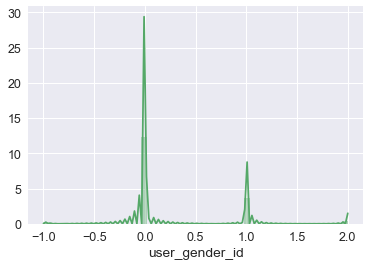

In [78]:
sns.distplot(train_df["user_gender_id"][train_df["is_trade"]==1])
plt.show()
# train_df["user_gender_id"][train_df["is_trade"]==1]

## 不同性别的成交率

In [79]:
gender_trade_rate = pd.DataFrame({"gender_trade_rate":train_df.groupby(by=["user_gender_id","is_trade"]).size()})
gender_trade_rate = gender_trade_rate.reset_index("is_trade")
tmp_df = gender_trade_rate[gender_trade_rate["is_trade"]==1]/gender_trade_rate[gender_trade_rate["is_trade"]==0]
del tmp_df["is_trade"]
tmp_df = tmp_df.reset_index()
tmp_df
# tmp_df["gender_trade_rate"] = tmp_df["gender_trade_rate"].apply(np.log)
# tmp_df = tmp_df.sort_values("gender_trade_rate")
# sns.barplot(x="user_gender_id",y="gender_trade_rate",data=tmp_df,order=[-1,0,2,1])
# plt.yscale("log")
# plt.show()

,user_gender_id,gender_trade_rate
0,-1.0,0.013035
1,0.0,0.018820
2,1.0,0.021656
3,2.0,0.019204


In [80]:
user_gender_df = pd.DataFrame({"user_gender_instance":train_df.groupby(by=["user_id"]).size()})
user_gender_df = user_gender_df.reset_index()
user_gender_df[user_gender_df["user_gender_instance"]>1].sort_values("user_id").shape

(104288, 2)

同一个user_id不同的性别，记录数目和user_id的数目不同，说明同一个用户id有对应不同的gender的

In [84]:
# # gender_df.drop_duplicates("combin",inplace=True)
# gender_df_c = pd.DataFrame({"count":user_gender_df.groupby(by=["user_id","combin"]).size()}).reset_index()
# gender_df_c[gender_df_c["count"]>1]

In [85]:
# pd.DataFrame({"collected_rate":train_df.groupby(by=["item_collected_level","is_trade"]).size()}）
def collected_rate_map(data):
    tmp_df = pd.DataFrame({"collected_rate":data.groupby(by=["item_collected_level","is_trade"]).size()}).reset_index("is_trade")
    tmp_df = tmp_df[tmp_df["is_trade"] == 1]["collected_rate"]/tmp_df[tmp_df["is_trade"] == 0]["collected_rate"]
    collected_rate = pd.DataFrame({"collected_rate":tmp_df}).reset_index()
    return collected_rate

In [86]:
collected_rate_map(train_df)

,item_collected_level,collected_rate
0,0,0.007246
1,1,0.007576
2,2,0.020747
3,3,0.010764
4,4,0.011655
5,5,0.012274
6,6,0.018003
7,7,0.012906
8,8,0.014687
9,9,0.018201


In [92]:
def collected_level_count_map(data,days):
    processed_data = []
    for data_,day in zip(data_split_by_day(train_df,TRAIN_DAY),TRAIN_DAY):
        tmp_df = count_collected_level(data_)
        tmp_df["dow"] = day
        processed_data.append(tmp_df)
        

# processed_data = []
# for data_,day in zip(data_split_by_day(train_df,TRAIN_DAY),TRAIN_DAY):
#     tmp_df = count_collected_level(data_)
#     tmp_df["day"] = day
#     processed_data.append(tmp_df)
# tmp_df = pd.concat(processed_data)



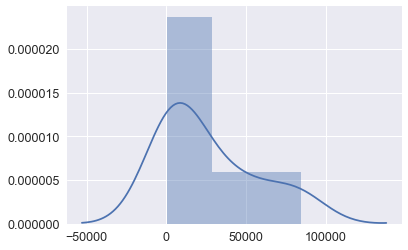

In [90]:
def count_collected_level(data):
    return pd.DataFrame({"collected_level_count":data.groupby(by=["item_collected_level"]).size()})
sns.distplot(count_collected_level(train_df))
plt.show()

这个特征其实有点尴尬
1. 随着时间的变化，collected_level会变化，其实user相关的一些信息也会变化啊
1. day比day-1的效果还好，什么意思，是不是一个平均的collected效果要比每天的要更有用。

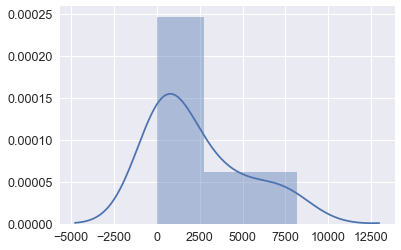

In [93]:
sns.distplot(count_collected_level(test_b_df))
plt.show()

以上
1. 训练集和测试集里面collected_level的数据分布比较像，所以假设他们的转化率分布也比较像。

分析一下，同一个用户同一个商品的多次点击与成交的情况

In [94]:
# 先看一下用户和商品配对的点击数量分布
def user_item_count(data):
    tmp_df = pd.DataFrame({"user_item_count":data.groupby(by=["user_id","item_id"]).size()})
    tmp_df = tmp_df.reset_index()
    return tmp_df

def user_item_show(data):
    tmp_df = data[["user_id","item_id"]]
    tmp_df = tmp_df.merge(user_item_count(data),on=["user_id","item_id"],how="left")
    return tmp_df[["user_item_count"]].groupby(by=["user_item_count"]).size()

user_item_show(train_df)
#     sns.barplot(x="user_item_count",y="user_item_count_2",data=train_df)
#     plt.show()

user_item_count
1     415986
2      48226
3       9537
4       2812
5        885
6        300
7        182
8         56
9         27
10        30
11        11
12        24
14        14
15        45
dtype: int64

In [95]:
user_item_show(test_b_df)

user_item_count
1    39731
2     2674
3      357
4      104
5       10
6       12
dtype: int64

In [96]:
user_item_show(train_df[train_df["is_trade"] == 1])

user_item_count
1    8934
2      80
3       6
dtype: int64

以上
1. 实际上超过6次的点击很少。
1. 因为时间短，其实重复购买的数量会比较少，总共86个有重复购买的记录。

In [97]:
train_df[train_df["user_id"] == 6140311644952863516][train_df["item_id"] == 5997981559301046248]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,shop_score_service,shop_score_delivery,shop_score_description,is_trade,time_,day,hour,time_t,min,dow
59098,7683619383911457888,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,12.0,12,16,...,0.971999,0.973024,0.980329,0,2018-09-18 08:31:03,1,8,2018-09-18 08:31:03,31,1
59265,8767768748144533033,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,12.0,12,16,...,0.971999,0.973024,0.980329,0,2018-09-18 16:56:11,1,16,2018-09-18 16:56:11,56,1
134435,3235506877963023837,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,13.0,12,16,...,0.972232,0.973216,0.980623,0,2018-09-21 10:07:27,4,10,2018-09-21 10:07:27,7,4
202246,6718123102276547313,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,12.0,12,16,...,0.971991,0.973010,0.980381,0,2018-09-19 08:42:38,2,8,2018-09-19 08:42:38,42,2
202285,7024120089725382113,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,12.0,12,16,...,0.971991,0.973010,0.980381,0,2018-09-19 17:02:55,2,17,2018-09-19 17:02:55,2,2
202379,2904360336848783093,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,12.0,12,16,...,0.971991,0.973010,0.980381,0,2018-09-19 09:08:21,2,9,2018-09-19 09:08:21,8,2
270322,8876214365839459550,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,12.0,12,16,...,0.972200,0.973198,0.980569,0,2018-09-20 12:23:22,3,12,2018-09-20 12:23:22,23,3
270505,5189058324366485559,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,12.0,12,16,...,0.972200,0.973198,0.980569,0,2018-09-20 19:57:49,3,19,2018-09-20 19:57:49,57,3
340950,1085558988628485602,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,13.0,12,17,...,0.972255,0.973222,0.980723,0,2018-09-22 22:50:23,5,22,2018-09-22 22:50:23,50,5
340976,8992555830437844627,5997981559301046248,7908382889764677758;2642175453151805566;886888...,2072967855524022579;2072967855524022579;513128...,8.188724e+18,5.918626e+18,4,13.0,12,17,...,0.972255,0.973222,0.980723,0,2018-09-22 19:59:37,5,19,2018-09-22 19:59:37,59,5


In [98]:
train_df[train_df["user_id"] == 227123988621178059][["user_id","user_gender_id"]]

,user_id,user_gender_id
58914,227123988621178059,0.0
59597,227123988621178059,0.0
59598,227123988621178059,0.0


In [99]:
def nan_count(data,bias=0):
    nan_count_df = pd.DataFrame(data.isnull().sum(axis=1),columns=["nan_count"],)
    nan_count_df = nan_count_df[nan_count_df.values>0]
    if nan_count_df.shape[0] > 0:
        print(nan_count_df.describe())
        print(nan_count_df.groupby(by="nan_count").size())
        df_vis = pd.DataFrame([])
        df_vis["nan_count_count"] = nan_count_df.groupby(by="nan_count",as_index=False).size()
        df_vis = df_vis.reset_index()
        df_vis.sort_values("nan_count_count")
        df_vis.iloc[0]["nan_count_count"] -= bias # 除去gender缺失的
        df_vis = df_vis.copy()
        print(df_vis)
        sns.barplot(x="nan_count",y="nan_count_count",data=df_vis)
        plt.show()
    else:
        print("no nan value")

In [100]:
nan_count(train_df,12902)

no nan value


In [101]:
nan_count(test_df,468)

no nan value


缺少4个的，一般都是缺少user_gender_id,user_age_level,user_star_level,user_occupation_id
* user_star_level都缺失，这是什么情况

缺少一个的情况
* 大部分在user_gender_id,其他事item的缺失item_brand_id,item_city_id,item_sales_level,这个倒是提醒，是不是说用户会缺失的只有user_gender_id
* 其实缺少user信息的和缺少item信息的不是一个特征，是不是要标记下，记录缺失哪些。
* 看下成交的里面有没有缺失数据的，缺的是哪些？


In [102]:
nan_is_trade = 9021-train_df[train_df["is_trade"]==1].count().sort_values()
nan_all = 478138-train_df.count().sort_values()
nan_df = pd.concat([nan_is_trade,nan_all],axis=1)
nan_df.columns = ["nan_is_trade","nan_all"]
nan_df["ratio"] = nan_df["nan_is_trade"]/nan_df["nan_all"]
print(nan_df.sort_values(by="nan_is_trade",ascending=False))

                           nan_is_trade  nan_all     ratio
instance_id                           1        3  0.333333
user_star_level                       1        3  0.333333
context_id                            1        3  0.333333
item_id                               1        3  0.333333
item_category_list                    1        3  0.333333
item_property_list                    1        3  0.333333
item_brand_id                         1        3  0.333333
item_city_id                          1        3  0.333333
item_price_level                      1        3  0.333333
item_sales_level                      1        3  0.333333
item_collected_level                  1        3  0.333333
item_pv_level                         1        3  0.333333
user_id                               1        3  0.333333
user_gender_id                        1        3  0.333333
user_age_level                        1        3  0.333333
user_occupation_id                    1        3  0.3333

In [103]:
nan_df.sort_values(by="nan_is_trade",ascending=False).fillna(0)

,nan_is_trade,nan_all,ratio
instance_id,1,3,0.333333
user_star_level,1,3,0.333333
context_id,1,3,0.333333
item_id,1,3,0.333333
item_category_list,1,3,0.333333
item_property_list,1,3,0.333333
item_brand_id,1,3,0.333333
item_city_id,1,3,0.333333
item_price_level,1,3,0.333333
item_sales_level,1,3,0.333333


In [104]:
unnan_is_trade = train_df[train_df["is_trade"]==1].count().sort_values()
unnan_all = train_df.count().sort_values()
unnan_df = pd.concat([unnan_is_trade,unnan_all],axis=1)
unnan_df.columns = ["unnan_is_trade","unnan_all"]
unnan_df["ratio"] = unnan_df["unnan_is_trade"]/unnan_df["unnan_all"]
print(unnan_df.sort_values(by="unnan_is_trade",ascending=False))

                           unnan_is_trade  unnan_all     ratio
instance_id                          9020     478135  0.018865
user_star_level                      9020     478135  0.018865
context_id                           9020     478135  0.018865
item_id                              9020     478135  0.018865
item_category_list                   9020     478135  0.018865
item_property_list                   9020     478135  0.018865
item_brand_id                        9020     478135  0.018865
item_city_id                         9020     478135  0.018865
item_price_level                     9020     478135  0.018865
item_sales_level                     9020     478135  0.018865
item_collected_level                 9020     478135  0.018865
item_pv_level                        9020     478135  0.018865
user_id                              9020     478135  0.018865
user_gender_id                       9020     478135  0.018865
user_age_level                       9020     478135  0

以上：
1. 不缺的情况下，成交率基本上是0.019，所以brand_id的缺失，没有太大影响。
1. shop_score相关的三个打分如果缺失，反而成交率比较高，看下这几个shop的记录
1. item_city_id，shop_review_positive_rate如果存在缺失值，不会有成交记录
1. item_sales_level如果有缺失，成交的几率很低

In [105]:
nan_shop_df = train_df[train_df["shop_score_delivery"].isnull() \
                        & train_df["shop_score_service"].isnull() \
                        & train_df["shop_score_description"].isnull()\
#                        )]
                        & train_df["is_trade"]==1]
print(nan_shop_df.info())
nan_shop_df[["item_id","shop_id","user_id"]]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 33 columns):
instance_id                  0 non-null int64
item_id                      0 non-null int64
item_category_list           0 non-null object
item_property_list           0 non-null object
item_brand_id                0 non-null float64
item_city_id                 0 non-null float64
item_price_level             0 non-null int64
item_sales_level             0 non-null float64
item_collected_level         0 non-null int64
item_pv_level                0 non-null int64
user_id                      0 non-null int64
user_gender_id               0 non-null float64
user_age_level               0 non-null float64
user_occupation_id           0 non-null float64
user_star_level              0 non-null float64
context_id                   0 non-null int64
context_timestamp            0 non-null int64
context_page_id              0 non-null int64
predict_category_property    0 non-null object
shop_id         

,item_id,shop_id,user_id


In [106]:
train_df[(train_df["user_id"]==6337803726681298297)\
         | (train_df["user_id"]==3379942221749116947)\
         | (train_df["user_id"]==6110404049727419631)]

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,shop_score_service,shop_score_delivery,shop_score_description,is_trade,time_,day,hour,time_t,min,dow
113533,1135886239068279425,8569396460587831427,7908382889764677758;509660095530134768,2072967855524022579;5131280576272319091;263639...,2.126020e+18,3.819393e+18,4,8.0,6,15,...,0.978105,0.971064,0.978105,0,2018-09-21 18:24:31,4,18,2018-09-21 18:24:31,24,4
113543,641201093056271361,8569396460587831427,7908382889764677758;509660095530134768,2072967855524022579;5131280576272319091;263639...,2.126020e+18,3.819393e+18,4,8.0,6,15,...,0.978105,0.971064,0.978105,0,2018-09-21 17:47:58,4,17,2018-09-21 17:47:58,47,4
148964,5529696745033576111,2363012331182595245,7908382889764677758;7258015885215914736,5131280576272319091;2636395404473730413;643479...,1.467983e+18,4.385376e+18,6,5.0,6,10,...,-1.000000,-1.000000,-1.000000,1,2018-09-21 17:50:16,4,17,2018-09-21 17:50:16,50,4
148965,3084384414585870105,6516134243871265710,7908382889764677758;7258015885215914736,2072967855524022579;5131280576272319091;263639...,1.467983e+18,4.385376e+18,5,6.0,6,11,...,-1.000000,-1.000000,-1.000000,1,2018-09-21 18:32:05,4,18,2018-09-21 18:32:05,32,4


In [107]:
train_df[(train_df["item_id"]==2363012331182595245)].shape

(26, 33)

In [108]:
train_df[(train_df["item_id"]==6516134243871265710)].shape

(69, 33)

In [109]:
train_df[(train_df["item_id"]==6242042086940541911)].shape

(1, 33)

In [110]:
train_df[(train_df["item_id"]==2363012331182595245)\
         | (train_df["item_id"]==6516134243871265710)\
         | (train_df["item_id"]==6242042086940541911)].shape

(96, 33)

In [111]:
train_df[(train_df["shop_id"]==4524540991699130969)].shape

(95, 33)

In [112]:
train_df[(train_df["shop_id"]==4412853177662450874)].shape

(1, 33)

In [113]:
train_df[(train_df["shop_id"]==4524540991699130969)\
         | (train_df["shop_id"]==4412853177662450874)].shape

(96, 33)

In [114]:
train_df[(train_df["shop_id"]==4524540991699130969)\
         | (train_df["shop_id"]==4412853177662450874)\
         | (train_df["item_id"]==2363012331182595245)\
         | (train_df["item_id"]==6516134243871265710)\
         | (train_df["item_id"]==6242042086940541911)].shape

(96, 33)

没有任何打分，然后成交的。
1. 这些店铺的货品少？
1. item_id只属于同一个shop_id

In [115]:
# 看起来，两个的组合有对应关系，这样可以降维
print(train_df.groupby(by=["item_id","shop_id"]).size())
print("item_id count",len(train_df["item_id"].unique()))

item_id              shop_id            
696490723789804      2415706849209086313     14
1097631460775571     5178628068961795461     59
1637165183538885     2812740821675041732     66
3341342041473146     8015415513847822517      2
4055398786868336     6562840017614153006      1
4255654217639344     5462611198875872549      7
6536469184064787     9037078140635082307      1
7683654146703952     2530636067096856606      1
9393908124420502     5597918953716155799     49
10102212873966760    4894698911827655838     39
11072115662022791    7193611998881969053     19
11575232304866102    3910209411429339401     53
12249482967749017    7934248476207404773      1
13831602287370737    4330050383994505508      5
13847980288352425    8447384000306709277     13
15553563904368131    4828403058641032848      1
16284947754376399    2500353972861775706     15
17237758063064615    5407421979705782959      1
17805442322617113    8152862541039425133      1
18506393802199063    8037526266286035337      4

所以，实际上shop_id和item_id的组合是没有意义的。item_id本身就能标记shop_id

In [116]:
user_shop_trade_df = train_df.groupby(by=["user_id","shop_id","is_trade"]).size()
user_shop_trade_df = pd.DataFrame({'user_shop_trade_count':user_shop_trade_df})  
ind = user_shop_trade_df["user_shop_trade_count"].unique()
user_shop_trade_df.reset_index(inplace=True)
temp_df = user_shop_trade_df.groupby(by="user_shop_trade_count").size()
temp_df = pd.DataFrame({"user_shop_trade_count_count":temp_df})
temp_df.reset_index(inplace=True)
user_shop_trade_df = user_shop_trade_df.merge(temp_df,on="user_shop_trade_count",how="left")
user_shop_trade_df.head()

,user_id,shop_id,is_trade,user_shop_trade_count,user_shop_trade_count_count
0,24779788309075,3188537021527311192,0,1,397913
1,24779788309075,4726686942815366559,0,2,29352
2,36134987234568,3305443625660114276,0,1,397913
3,59341486148291,185374726844308312,0,1,397913
4,179317972644611,180517674994060018,0,1,397913


In [117]:
train = train_df.merge(user_shop_trade_df,on=["user_id","shop_id","is_trade"],how="left")

D:\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


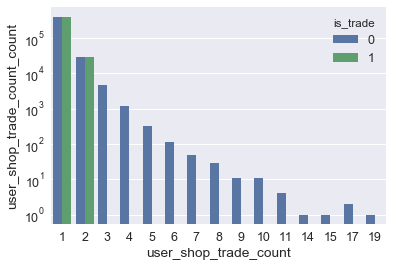

In [118]:
sns.barplot(x = "user_shop_trade_count",
            y = "user_shop_trade_count_count",
            hue="is_trade",
            data=train[train["day"]==4])
plt.yscale("log")
plt.show()

## 分店铺点击次数统计

feature,user_shop_trade_count,user_shop_trade_count_count,is_trade
0,1,397913,0
1,1,397913,1
2,2,29352,0
3,2,29352,1
4,3,4564,0
5,3,4564,1
6,4,1153,0
7,5,317,0
8,6,115,0
9,7,48,0


In [197]:
print("%e" % 1000)

1.000000e+03


In [204]:
def label_formatter(params):
    return ("%e" % params.value)
from pyecharts import Bar, Grid
grid = Grid(width=900, height=850)
grid.use_theme("dark")
top = 50
left = 70
row = 1

for day in range(1,8):
    tmp_df = train[train["day"]==day]
    tmp_df = tmp_df.groupby(["user_shop_trade_count","is_trade"]).first().reset_index()[["user_shop_trade_count","user_shop_trade_count_count","is_trade"]]
    bar = Bar("分店铺每日点击次数成交统计",title_pos="center")
    x = tmp_df[tmp_df["is_trade"]==1]["user_shop_trade_count"]
    y =  tmp_df[tmp_df["is_trade"]==1]["user_shop_trade_count_count"]
    bar.add("day"+str(day)+"成交", x,y, 
            legend_top=top, legend_pos=left,yaxis_type="log")
    x = tmp_df[tmp_df["is_trade"]==0]["user_shop_trade_count"]
    y =  tmp_df[tmp_df["is_trade"]==0]["user_shop_trade_count_count"]
    bar.add("day"+str(day)+"未成交", x,y, 
            legend_top=top, legend_pos=left+200,yaxis_type="log", legend_orient="verticle")
    grid.add(bar,grid_top=top, grid_left=left, grid_width=300, grid_height=150)
    row = (row+1)%2
    top = top + 200*row
    left = (left + 450) % 900

grid

D:\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


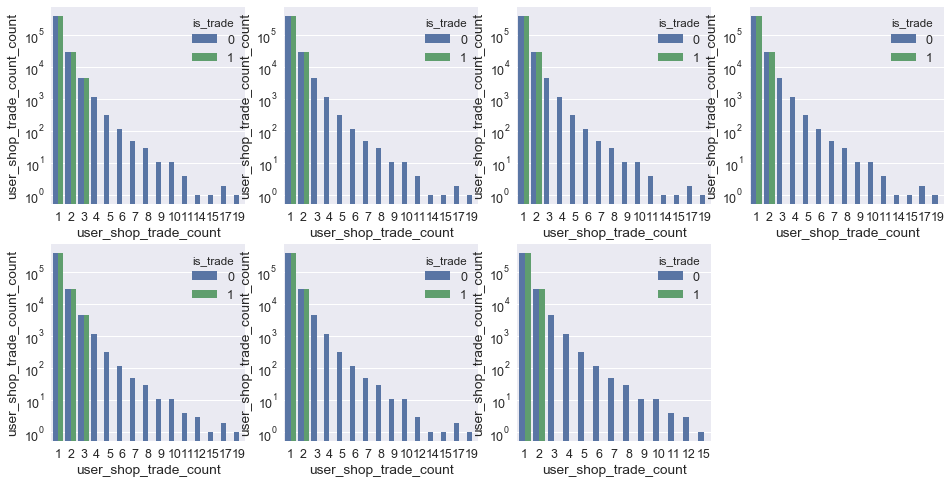

In [119]:
plt.subplots(figsize=(16,8))
plt.subplot(241)
sns.barplot(x = "user_shop_trade_count",
            y = "user_shop_trade_count_count",
            hue="is_trade",
            data=train[train["day"]==1])
plt.yscale("log")

plt.subplot(242)
sns.barplot(x = "user_shop_trade_count",
            y = "user_shop_trade_count_count",
            hue="is_trade",
            data=train[train["day"]==2])
plt.yscale("log")

plt.subplot(243)
sns.barplot(x = "user_shop_trade_count",
            y = "user_shop_trade_count_count",
            hue="is_trade",
            data=train[train["day"]==3])
plt.yscale("log")

plt.subplot(244)
sns.barplot(x = "user_shop_trade_count",
            y = "user_shop_trade_count_count",
            hue="is_trade",
            data=train[train["day"]==4])
plt.yscale("log")

plt.subplot(245)
sns.barplot(x = "user_shop_trade_count",
            y = "user_shop_trade_count_count",
            hue="is_trade",
            data=train[train["day"]==5])
plt.yscale("log")

plt.subplot(246)
sns.barplot(x = "user_shop_trade_count",
            y = "user_shop_trade_count_count",
            hue="is_trade",
            data=train[train["day"]==6])
plt.yscale("log")

plt.subplot(247)
sns.barplot(x = "user_shop_trade_count",
            y = "user_shop_trade_count_count",
            hue="is_trade",
            data=train[train["day"]==7])
plt.yscale("log")
plt.show()

这个：
1. 同一个user，在一个店铺的点击超过3次，不会发生交易。
1. 需要确定一下，当天，或者两天范围内，这个结论有没有变化，如果结论变化的话，这个统计结果就穿越了。
1. 根据上面这个结果看的话，我觉得，特征不会穿越，训练数据应该选[2，3，4，6，7]
1. 是不是可以假设，1是周一，2是周2，3是周3，周一，和周五有相对较多的点击次数，这样应该是。如果是这样，那么预测的那一天应该是周一，会是图1的趋势。
1. 这个数据说明，点击率超过3次，基本不会买，正常会买的点击次数在三次以内。

所以
1. 缺5和缺7的考虑去掉
1. 缺2的没有成交的记录，考虑nan_count可以作为一个特征来处理。
1. 

要看一下最后一天的时间分配情况，就是说，应该根据测试集数据的分布情况，来看训练集的数据如何采样。
这个数据里面，训练集的数据每一天6.8万左右，测试集1.8万，大于3:1，如果有两天的训练数据，这个数据集的比例是13.6:1.8,还可以，训练集拆分成7:3的话，应该也可以了。现在的比例是5:5
要考察下测试集数据时间分布情况和训练集的一天的数据分布有什么关系。

In [120]:
# 训练集里面有多少列有缺失，排个序看看
def missingValueAnalysis(data,name):
    print("data count is %s" %(data.shape[0]))
    import matplotlib.pyplot as plt
    null_value_count = data.isnull().sum()
    null_value_count.name = name+"_null_value_count"
    null_value_count.index.name = "feature"
    # print(null_value_count)
    f, ax = plt.subplots(figsize = (8, 4))

    null_value_count[null_value_count>0].sort_values().plot(kind="barh")
    plt.xscale("log")
    plt.show()
    return null_value_count

In [121]:
mvTrain = missingValueAnalysis(train,"train")

data count is 478135


TypeError: Empty 'DataFrame': no numeric data to plot

* 性别缺失最多,貌似这个和网上消息不太一致啊，缺了1/4的数据
* user_star_level,user_age_level,user_occupation_id，这三个缺失比例差不多，基本上就是一样，这个和之前corr分析的一样，相关性一样，缺失的级别也一样。
* 


In [122]:
train_df.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'time_', 'day', 'hour', 'time_t',
       'min', 'dow'],
      dtype='object')

In [123]:
train_df.sort_values(by=["shop_id","user_id","time_"])[["shop_id","user_id","item_id","time_","is_trade"]]
# train_df.groupby(by = ["item_id","item_brand_id"])
print("train time span : [%s,%s] "% (train_df["time_"].min(),train_df["time_"].max()))

train time span : [2018-09-18 00:00:01,2018-09-24 23:59:47] 


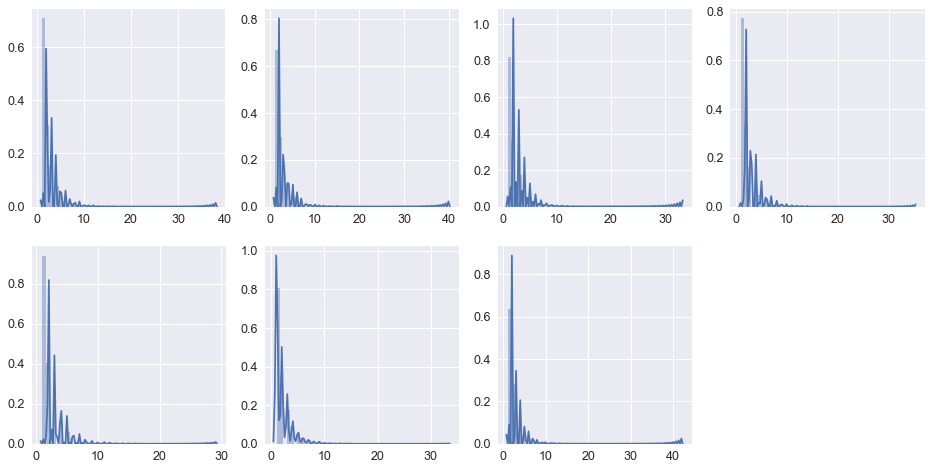

In [125]:
plt.subplots(figsize=(16,8))
plt.subplot(241)
sns.distplot(train_df[train_df["day"] == 1].groupby("user_id").size())
plt.subplot(242)
sns.distplot(train_df[train_df["day"] == 2].groupby("user_id").size())
plt.subplot(243)
sns.distplot(train_df[train_df["day"] == 3].groupby("user_id").size())
plt.subplot(244)
sns.distplot(train_df[train_df["day"] == 4].groupby("user_id").size())
plt.subplot(245)
sns.distplot(train_df[train_df["day"] == 5].groupby("user_id").size())
plt.subplot(246)
sns.distplot(train_df[train_df["day"] == 6].groupby("user_id").size())
plt.subplot(247)
sns.distplot(train_df[train_df["day"] == 7].groupby("user_id").size())

plt.show()


In [128]:
# print("test time span : [%s,%s] "% (test_df["time_"].min(),test_df["time_"].max()))

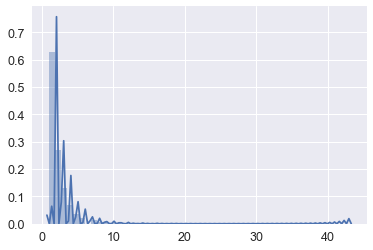

In [127]:
sns.distplot(test_df.groupby("user_id").size())
plt.show()

In [129]:
train_df = pd.merge(train_df,
                    pd.DataFrame(train_df.groupby("user_id").size(),columns=["user_count"]).reset_index(),on=["user_id"],how="left")

In [130]:
day1 = train_df[train_df["day"] == 1]

In [131]:
print(day1[day1["user_count"]>14].shape[0])
print(day1[day1["user_count"]>14][day1["is_trade"] == 1].shape[0])
print(day1[day1["user_count"]>14][day1["is_trade"] == 1].shape[0]/day1[day1["user_count"]>14].shape[0])

2861
18
0.006291506466270535


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
print(day1[day1["is_trade"] == 1].shape[0],day1.shape[0],day1[day1["is_trade"] == 1].shape[0]/day1.shape[0])

1567 78268 0.020020953646445547


In [133]:
train_df.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'time_', 'day', 'hour', 'time_t',
       'min', 'dow', 'user_count'],
      dtype='object')

In [137]:
# mvTest = missingValueAnalysis(test_df,"test_df")

In [136]:
# df = pd.DataFrame([mvTrain,mvTest]).T

In [ ]:
# df["rate"] = df["train_null_value_count"]/df["test_a_null_value_count"]
# print("train/test = %.2f"% (478138/18371))
# df.dropna().sort_values(by="rate")


In [ ]:
# df["train_null_value_count"]/=478138
# df["test_a_null_value_count"] /= 18371
# df.dropna()[["train_null_value_count","test_a_null_value_count"]].plot(kind="barh")
# plt.xscale("log")
# plt.show()

* 以上，缺失比例，大概有个2倍的关系。缺失比例和数据规模比例差不多的有user_gender_id，item_sales_level，item_brand_id，其他信息都更全
* positive_rate在测试集中，不缺，在训练集中缺。
* user_gender_id, item_sales_level, item_brand_id 这几个在测试集和训练集里面差不多

In [138]:
train_df[["user_gender_id","user_age_level","user_occupation_id","user_star_level"]].describe()

,user_gender_id,user_age_level,user_occupation_id,user_star_level
count,478135.000000,478135.000000,478135.000000,478135.000000
mean,0.213051,1001.456484,1999.961329,2998.177897
std,0.514698,45.052935,89.901112,134.752080
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,1003.000000,2002.000000,3003.000000
50%,0.000000,1003.000000,2005.000000,3004.000000
75%,0.000000,1004.000000,2005.000000,3006.000000
max,2.000000,1007.000000,2005.000000,3010.000000


In [139]:
train_df[train_df[["user_gender_id","user_age_level","user_occupation_id","user_star_level"]].T.sum()==-4].shape

(963, 34)

In [140]:
train_df[train_df["user_gender_id"]==-1].shape

(12901, 34)

In [141]:
train_df["user_age_level"].describe()

count    478135.000000
mean       1001.456484
std          45.052935
min          -1.000000
25%        1003.000000
50%        1003.000000
75%        1004.000000
max        1007.000000
Name: user_age_level, dtype: float64

In [142]:
gender_ = train_df[train_df["user_star_level"].notnull()]
gender_ = gender_[gender_["user_age_level"].notnull()]
gender_ = gender_[gender_["user_occupation_id"].notnull()]

In [143]:
train_df[train_df["shop_review_positive_rate"].isnull()]

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,shop_score_delivery,shop_score_description,is_trade,time_,day,hour,time_t,min,dow,user_count


In [144]:
train_df["context_page_id"].unique()

array([4006, 4001, 4016, 4003, 4010, 4005, 4020, 4014, 4007, 4002, 4004,
       4015, 4011, 4012, 4009, 4018, 4008, 4017, 4013, 4019], dtype=int64)

In [145]:
train_ = train_df.drop(train["shop_review_positive_rate"].isnull()==True)

In [146]:
train_[train_["shop_review_positive_rate"].notnull()].shape

(478134, 34)

* 这7个记录都没成交

In [147]:
# 需要看一下，每类数据有多少缺失，然后排序。看下哪些缺的比较严重。
import matplotlib.pyplot as plt

In [150]:
count_miss = raw_data_df.shape[0] - raw_data_df.count()
count_miss.sort_values(ascending=True,inplace=True)
count_miss[count_miss>0].plot.barh(log=True)
plt.show()

NameError: name 'raw_data_df' is not defined

1. [1]user_gender_id 用户的预测性别编号<br>
    Int类型；0表示女性用户，1表示男性用户，2表示家庭用户<br>
    缺失最多
1. [1]user_occupation_id<br>
    用户的预测职业编号，Int类型
1. [1]user_age_level<br>
    用户的预测年龄等级，Int类型；数值越大表示年龄越大
1. [1]user_star_level<br>
    用户的星级编号，Int类型；数值越大表示用户的星级越高
1. [1]item_sales_level<br>
    广告商品的销量等级，Int类型；取值从0开始，数值越大表示销量越大
1. [1]item_brand_id<br>
    广告商品的品牌编号，Long类型
1. [1]item_city_id<br>
    广告商品的城市编号，Long类型
1. [1]shop_score_description<br>
    店铺的描述相符评分，Double类型；取值在0到1之间，数值越大表示评分越高
1. [1]shop_score_service<br>
    店铺的服务态度评分，Double类型；取值在0到1之间，数值越大表示评分越高
1. [1]shop_score_delivery<br>
    店铺的物流服务评分，Double类型；取值在0到1之间，数值越大表示评分越高
1. shop_review_positive_rate<br>
    店铺的好评率，Double类型；取值在0到1之间，数值越大表示好评率越高

In [151]:
sample_data_df = raw_data_df.sample(frac=0.05)

NameError: name 'raw_data_df' is not defined

In [152]:
sample_data_df.info()

NameError: name 'sample_data_df' is not defined

In [153]:
count_miss = sample_data_df.shape[0] - sample_data_df.count()
count_miss.sort_values(ascending=True,inplace=True)
count_miss[count_miss>0].plot.barh(log=True)
plt.show()

NameError: name 'sample_data_df' is not defined

![image.png](attachment:image.png)

In [154]:
import numpy as np
cols = ['item_id', 'item_category_list',
       'item_property_list', 'item_brand_id', 'item_city_id',
       'item_price_level', 'item_sales_level', 'item_collected_level',
       'item_pv_level',  'user_gender_id', 'user_age_level',
       'user_occupation_id', 'user_star_level',
       'predict_category_property','shop_review_num_level',
       'shop_review_positive_rate', 'shop_star_level',
       'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade']
cols = ['user_star_level','is_trade']
cm = np.corrcoef(sample_data_df[cols].values.T)

NameError: name 'sample_data_df' is not defined

In [155]:
# 未缺失的数据，先转换一下看看
# 在测试集里面好评率没有缺失。不存在测试集中数据缺失，但是训练集中没有缺失的情况。
# 关于这个，有缺失的话，是可以根据其他数据补充的吧。看下。
sample_data_df[["shop_review_positive_rate"]].info()

NameError: name 'sample_data_df' is not defined

In [156]:
import seaborn as sns

cols = ["shop_review_positive_rate","item_id"]
f, ax= plt.subplots(figsize = (14, 10))

# 对于类别的产品，看一下统计情况
# raw_data_df[["item_id"]].apply(pd.value_counts).plot(kind='bar',logy=True)
# raw_data_df[["item_brand_id"]].apply(pd.value_counts).plot(kind='bar',logy=True)
# raw_data_df[["item_city_id"]].apply(pd.value_counts).plot(kind='bar',logy=True)
# raw_data_df[["user_gender_id"]].apply(pd.value_counts).plot(kind='bar')
ax.set_yscale("log")
order = raw_data_df[raw_data_df["is_trade"]==1][["item_category_list"]].apply(pd.value_counts).index.tolist()
sns.countplot(x="item_category_list",data=raw_data_df,hue="is_trade",ax=ax,order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)

# raw_data_df[raw_data_df["is_trade"]==0][["item_category_list"]].apply(pd.value_counts).plot(kind='bar')
plt.show()
# print(df.index.get_values(),df.values,range(len(df.values)))
# df.plot().bar(list(range(len(df.values))),df.values)
# plt.legend()
# plt.show()
# 这种item相关的，可以分类统计，然后做分桶。数值上可能有点关系。
# 把Item出现的频率添加上？具体的数值不是特别好，要考虑测试集中，这部分数据从哪里搞。
# 这种做个bar图会好看一点


NameError: name 'raw_data_df' is not defined

In [ ]:
raw_data_df[["context_timestamp"]].apply(pd.to_datetime,unit='s')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(value_data["item_count"].apply(np.log))
plt.show()

In [ ]:
sns.distplot(value_data["user_count_log"])
plt.show()

In [ ]:
test_df[test_df["shop_review_positive_rate"] == -1]

考虑一下缺失值

In [ ]:
def nan_count(data):
    tmp_df = (data ==-1)
    tmp_df = tmp_df.apply(lambda x: x.sum(), axis=1)
    return tmp_df
df = nan_count(train_df)

In [ ]:
type(df)

In [ ]:
train_df.loc[148963]

In [ ]:
df.sort_values(ascending=False)

In [ ]:
test_df.columns

In [ ]:
df1 = nan_count(test_df)
df1.sort_values(ascending=False)

In [ ]:
test_data_df.replace(-1,np.nan,inplace=True)
test_data_df.info()

In [ ]:
count_miss_test = test_data_df.shape[0] - test_data_df.count()
count_miss_test.sort_values(ascending=True,inplace=True)
count_miss_test[count_miss_test>0].plot.barh(log=True)
plt.show()

注意，测试集里面缺失数据，缺失的内容和训练集是有差异的。<br>
性别都是最大的缺失项


In [ ]:
# 原始数据中值为-1的为缺失值
(raw_data_df == -1).sum()

In [ ]:
test_data_df.columns

In [ ]:
result_df = test_data_df[["instance_id"]]

In [ ]:
result_df["predicted_score"] = 0.5

In [ ]:
result_df

In [ ]:
import os
os.linesep = '\n'
result_df.to_csv("./Output/baseline.txt",sep = " ",index=False,line_terminator='\r')

In [ ]:
with open("./Output/baseline.txt","rw") as f:
    f.readline()